# Data Processing

In this notebook, we processed fixation data of 5 macaques and explored the relationship between their fixation patterns and the "surprisal" of events in a trial.

The directory **MonkeyData** contains a few relevant files: <br>
> _csv-timestamp_ : one file for each trial; each file contains one timestamp per line  <br>
_csv_ : one file for each trial; each file contains one event (pop-up) per line <br>
_csv-combined.csv_ : one event per line for all trial files (aggregated csv file) <br>

In other words, _csv_ was extracted from _csv-timestamp_

Variables log:
> _subj_: subject_ID = {"B":104, "C":102,"H":101,"J":103,"K":203} <br>
_trialtime_: start time of current trial in second <br>
_trial_: current trial number (each trial featured one of 80 possible visual-event sequences)(in order) <br>
_seq	current_: sequence number (one of 80 sequences) <br>
_seq_item_: current item number in a seq (in order) <br>
_active_item_: pop-up item (active box) <br>
_pre_active_: prior pop-up item (actve box) <br>
_next_active_:	next pop-up item (active box) <br>
_firstappear_: {0: "not first", 1: "first appear in the seq"} <br>
_looks_blank_: csv: total amount of time look at blank space for current event (ms); csv_timestamp: {1: "look blank at timestamp", 0: "not look blank at timestamp"} <br>
_looks_offscreen_: csv: total amount of time look offscreen for current event (ms); csv_timestamp: {1: "look offscreen at timestamp", 0: "not look offscreen at timestamp"} <br>
_time till target_: time spent to first start looking at the target object (ms)<br>
_looks target_:	csv: time spent to look at the target object (ms);csv_timestamp: look at the target or not at current timestamp (1 or 0)<br>
_look1,2,3_: time spent look at each object (ms) <br>
_location 123X, 123Y_: location of each box (location of the three boxes for a given sequence were chosen randomly, but remained static throughout the sequence) <br>
_item123id_: pop-up item ID (remained static throughout a sequence) <br>
_event time_: total time spent for the whole event (pop-up and go back) (ms) <br>
_eyeposX,Y_: eye position at current timestamp <br>


#### Data Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
import numpy as np
import os 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy import stats

path = "/content/drive/My Drive/Kidlala Lab/Monkilock/MonkeyData/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Convert csv_timestamps to csv 


In [ ]:
import pandas as pd 
import numpy as np
import os 

# filename = 'B120821.1.ML.csv'
for filename in os.listdir(path+'csv-timestamp'):
    # csv = pd.read_csv(path+'csv/'+filename)
    print(filename)
    csv_ts = pd.read_csv(path+'csv-timestamp/'+filename)

    time_diff = list(np.array([csv_ts['timestamps'][i]-csv_ts['timestamps'][i-1] for i in range(1,len(csv_ts))]))
    time_diffs = np.array([0] + time_diff)
    csv_ts['timestamps_diff'] = time_diffs
    csv_ts['looks_blank_ms'] = csv_ts['looks_blank'] * csv_ts['timestamps_diff']
    csv_ts['looks_offscreen_ms'] = csv_ts['looks_offscreen'] * csv_ts['timestamps_diff']
    csv_ts['looks_target_ms'] = csv_ts['looks_target'] * csv_ts['timestamps_diff']
    csv_ts['looks1_ms'] = csv_ts['looks1'] * csv_ts['timestamps_diff']
    csv_ts['looks2_ms'] = csv_ts['looks2'] * csv_ts['timestamps_diff']
    csv_ts['looks3_ms'] = csv_ts['looks3'] * csv_ts['timestamps_diff']

    csv_new = csv_ts.groupby(['subj','trialtime','trial','seq','seq_item',
                    'active_item','prev_active','next_active',
                    'firstappear','time_till_target','location1X',
                    'location1Y', 'location2X','location2Y', 'location3X',
                    'location3Y', 'item1id', 'item2id','item3id', 'date', 
                    'event_time'])['looks_blank_ms','looks_offscreen_ms',
                                  'looks_target_ms','looks1_ms',
                                  'looks2_ms','looks3_ms'].sum()
    csv_computed = csv_new.reset_index()
    csv_computed.to_csv(path+'csv/'+filename, index = True)

Aggregate csv data into csv-combined

In [ ]:
trials = []
for filename in os.listdir(path+'csv'):
    csv = pd.read_csv(path+'csv/'+filename)
    csv['filename'] = [filename for i in range(len(csv))] 
    trials.append(csv)
    
data = pd.concat(trials, ignore_index=True, sort=False)
data = data.drop(columns='Unnamed: 0')
data.to_csv(path+'csv-combined.csv', index = True)

In [ ]:
data = pd.read_csv(path+'csv-combined.csv').drop(columns='Unnamed: 0')
data

,subj,trialtime,trial,seq,seq_item,active_item,prev_active,next_active,firstappear,time_till_target,location1X,location1Y,location2X,location2Y,location3X,location3Y,item1id,item2id,item3id,date,event_time,looks_blank_ms,looks_offscreen_ms,looks_target_ms,looks1_ms,looks2_ms,looks3_ms,filename
0,104,0.006829,1,1,1,2,-1,1,1,346.65,894.53,266.41,122.18,254.24,670.61,513.19,15,26,37,120820.0,1520.2,53.21,0.0,1186.36,146.15,1186.36,133.28,B120821.1.ML.csv
1,104,1.552800,1,1,2,1,2,2,1,293.55,894.53,266.41,122.18,254.24,670.61,513.19,15,26,37,120820.0,1506.3,53.20,0.0,1225.90,1225.90,253.20,0.00,B120821.1.ML.csv
2,104,3.085400,1,1,3,2,1,2,0,213.61,894.53,266.41,122.18,254.24,670.61,513.19,15,26,37,120820.0,1507.1,39.90,0.0,1306.30,187.00,1306.30,0.00,B120821.1.ML.csv
3,104,4.618400,1,1,4,2,2,2,0,0.00,894.53,266.41,122.18,254.24,670.61,513.19,15,26,37,120820.0,1506.8,0.00,0.0,1532.60,0.00,1532.60,0.00,B120821.1.ML.csv
4,104,6.151200,1,1,5,2,2,1,0,0.00,894.53,266.41,122.18,254.24,670.61,513.19,15,26,37,120820.0,1506.8,0.00,0.0,1532.80,0.00,1532.80,0.00,B120821.1.ML.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19705,102,37.727000,2,22,26,2,3,1,0,-1.00,872.25,409.66,108.24,536.57,435.76,431.38,17,32,26,120822.0,1479.9,919.00,200.0,0.00,80.00,0.00,307.00,C120822.10.ML.csv
19706,102,39.233000,2,22,27,1,2,2,0,866.37,872.25,409.66,108.24,536.57,435.76,431.38,17,32,26,120822.0,1480.0,1346.00,14.0,146.00,146.00,0.00,0.00,C120822.10.ML.csv
19707,102,40.739000,2,22,28,2,1,1,0,-1.00,872.25,409.66,108.24,536.57,435.76,431.38,17,32,26,120822.0,1493.3,1266.00,14.0,0.00,240.00,0.00,0.00,C120822.10.ML.csv
19708,102,42.259000,2,22,29,1,2,3,0,-1.00,872.25,409.66,108.24,536.57,435.76,431.38,17,32,26,120822.0,1479.9,1359.00,147.0,0.00,0.00,0.00,0.00,C120822.10.ML.csv


In [ ]:
data.columns

Index(['subj', 'trialtime', 'trial', 'seq', 'seq_item', 'active_item',
       'prev_active', 'next_active', 'firstappear', 'time_till_target',
       'location1X', 'location1Y', 'location2X', 'location2Y', 'location3X',
       'location3Y', 'item1id', 'item2id', 'item3id', 'date', 'event_time',
       'looks_blank_ms', 'looks_offscreen_ms', 'looks_target_ms', 'looks1_ms',
       'looks2_ms', 'looks3_ms', 'filename'],
      dtype='object')

In [ ]:
import numpy as np
# change data type of columnns
data['subj'] = data['subj'].astype(int)
data['seq'] = data['seq'].astype(int)
data['seq_item'] = data['seq_item'].astype(int)
data['firstappear'] = data['firstappear'].astype(bool)
data['active_item'] = data['active_item'].astype(int)
data['prev_active'] = data['prev_active'].astype(int)
data['next_active'] = data['next_active'].astype(int)

# # sort data frame
data = data.sort_values(['trial','seq','seq_item'])

# add column to indicate if item is repeated or will repeat
data['repeated'] = (data['active_item']==data['prev_active'])
data['will_repeat'] = (data['active_item']==data['next_active'])

# change -1 values to NA (no previous or next active box)
data.loc[data['prev_active']==-1, 'prev_active'] = np.nan
data.loc[data['next_active']==-1, 'next_active'] = np.nan

# change name of column
data['rt'] = data['time_till_target'] 

Calculate distances between previous and current target

In [ ]:
# init all dists to 0
dists = np.zeros_like(data['next_active'], dtype=np.float)

# first case if active or prev active
dists[(data['prev_active'] == np.nan) | (data['next_active'] == np.nan)] = np.nan
# second case: betwixt items 2 and 1
inds = ((data['active_item'] == 1) & (data['prev_active'] == 2)) | ((data['active_item'] == 2) & (data['prev_active'] == 1))
dists[inds] = np.sqrt((data['location2X'][inds]-data['location1X'][inds])**2 + 
                        (data['location2Y'][inds]-data['location1Y'][inds])**2)
# third case: betwixt items 3 and 1
inds = ((data['active_item'] == 1) & (data['prev_active'] == 3)) | ((data['active_item'] == 3) & (data['prev_active'] == 1))
dists[inds] = np.sqrt((data['location3X'][inds]-data['location1X'][inds])**2 + 
                        (data['location3Y'][inds]-data['location1Y'][inds])**2)
# fourth case: betwixt items 3 and 2
inds = ((data['active_item'] == 2) & (data['prev_active'] == 3)) | ((data['active_item'] == 3) & (data['prev_active'] == 2))
dists[inds] = np.sqrt((data['location3X'][inds]-data['location2X'][inds])**2 + 
                        (data['location3Y'][inds]-data['location2Y'][inds])**2)
data['dist'] = dists
data = data.drop(columns=['location1X','location1Y','location2X','location2Y','location3X','location3Y'])


Compute look time variables


In [ ]:
## time look at any of the object
data['looks_object'] = data['looks1_ms'] + data['looks2_ms'] + data['looks3_ms']
## time look on screen (object or blank)
data['looks_onscreen'] = data['looks_object'] + data['looks_blank_ms']
## total look time
data['looks_all'] = data['looks_onscreen'] + data['looks_offscreen_ms']

data['looks_next_target'] = 0.0
data['looks_prev_target'] = 0.0
data['prop_looks_active'] = 0.0

## looks_next_target: time spent looking at the next active target in this event
## looks_prev_target: time spend looking at the previous active target in this event
for i in range(1,4):
    look_str = 'looks'+str(i)+"_ms"
    
    data.loc[data['next_active']==i, 'looks_next_target'] = data[look_str]
    data.loc[data['prev_active']==i, 'looks_prev_target'] = data[look_str]
    data.loc[data['active_item']==i, 'prop_looks_active'] = data[look_str] / data['looks_all']

## already look at target
data['already_there'] = False
data.loc[data['rt']==0, 'already_there'] = True
data.loc[data['rt']==-1, 'already_there'] = np.nan

data.loc[data['active_item']==1, 'looks_inactive'] = data['looks2_ms']+data['looks3_ms']
data.loc[data['active_item']==2, 'looks_inactive'] = data['looks1_ms']+data['looks3_ms']
data.loc[data['active_item']==3, 'looks_inactive'] = data['looks1_ms']+data['looks2_ms']

data.loc[data['active_item']==1, 'prop_looks_inactive'] = (data['looks2_ms']+data['looks3_ms']) / data['looks_onscreen']
data.loc[data['active_item']==2, 'prop_looks_inactive'] = (data['looks1_ms']+data['looks3_ms']) / data['looks_onscreen']
data.loc[data['active_item']==3, 'prop_looks_inactive'] = (data['looks1_ms']+data['looks2_ms']) / data['looks_onscreen']

## look-away: equal or more than 50% look blank plus off-screen
data['looks_away'] = (data['looks_blank_ms'] + data['looks_offscreen_ms']) / data['looks_all'] >= 0.5

In [ ]:
data

,subj,trialtime,trial,seq,seq_item,active_item,prev_active,next_active,firstappear,time_till_target,item1id,item2id,item3id,date,event_time,looks_blank_ms,looks_offscreen_ms,looks_target_ms,looks1_ms,looks2_ms,looks3_ms,filename,repeated,will_repeat,rt,dist,looks_object,looks_onscreen,looks_all,looks_next_target,looks_prev_target,prop_looks_active,already_there,looks_inactive,prop_looks_inactive,looks_away
0,104,0.006829,1,1,1,2,NaN,1.0,True,346.65,15,26,37,120820.0,1520.2,53.21,0.0,1186.36,146.15,1186.36,133.28,B120821.1.ML.csv,False,False,346.65,0.000000,1465.79,1519.0,1519.0,146.15,0.0,0.781014,0.0,279.43,0.183957,False
1,104,1.552800,1,1,2,1,2.0,2.0,True,293.55,15,26,37,120820.0,1506.3,53.20,0.0,1225.90,1225.90,253.20,0.00,B120821.1.ML.csv,False,False,293.55,772.445876,1479.10,1532.3,1532.3,253.20,253.2,0.800039,0.0,253.20,0.165242,False
2,104,3.085400,1,1,3,2,1.0,2.0,False,213.61,15,26,37,120820.0,1507.1,39.90,0.0,1306.30,187.00,1306.30,0.00,B120821.1.ML.csv,False,True,213.61,772.445876,1493.30,1533.2,1533.2,1306.30,187.0,0.852009,0.0,187.00,0.121967,False
3,104,4.618400,1,1,4,2,2.0,2.0,False,0.00,15,26,37,120820.0,1506.8,0.00,0.0,1532.60,0.00,1532.60,0.00,B120821.1.ML.csv,True,True,0.00,0.000000,1532.60,1532.6,1532.6,1532.60,1532.6,1.000000,1.0,0.00,0.000000,False
4,104,6.151200,1,1,5,2,2.0,1.0,False,0.00,15,26,37,120820.0,1506.8,0.00,0.0,1532.80,0.00,1532.80,0.00,B120821.1.ML.csv,True,False,0.00,0.000000,1532.80,1532.8,1532.8,0.00,1532.8,1.000000,1.0,0.00,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8125,102,83.099000,92,56,56,1,1.0,1.0,False,-1.00,42,15,27,130120.0,1493.2,1520.00,0.0,0.00,0.00,0.00,0.00,C130118.1.ML.csv,True,True,-1.00,0.000000,0.00,1520.0,1520.0,0.00,0.0,0.000000,NaN,0.00,0.000000,True
8126,102,84.618000,92,56,57,1,1.0,1.0,False,1239.50,42,15,27,130120.0,1479.9,1360.00,133.0,13.00,13.00,0.00,0.00,C130118.1.ML.csv,True,True,1239.50,0.000000,13.00,1373.0,1506.0,13.00,13.0,0.008632,0.0,0.00,0.000000,True
8127,102,86.125000,92,56,58,1,1.0,3.0,False,-1.00,42,15,27,130120.0,1479.8,1426.00,0.0,0.00,0.00,13.00,67.00,C130118.1.ML.csv,True,False,-1.00,0.000000,80.00,1506.0,1506.0,67.00,0.0,0.000000,NaN,80.00,0.053121,True
8128,102,87.631000,92,56,59,3,1.0,1.0,False,0.00,42,15,27,130120.0,1493.5,986.00,0.0,533.00,0.00,0.00,533.00,C130118.1.ML.csv,False,False,0.00,464.396302,533.00,1519.0,1519.0,0.00,0.0,0.350889,1.0,0.00,0.000000,True


### Sanity Check:


In [ ]:
monkey_subjs = np.array([101,102,103,104,203])

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy import stats

# plots setting
sns.set(font_scale=1.2)
plt.rcParams["axes.labelsize"] = 15
sns.set_style("white")

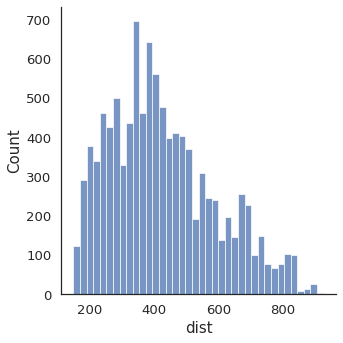

In [ ]:
dist_distribution = sns.displot(data[data['dist'] != 0]['dist'], kind="hist")
plt.show()

1. Time to get to target across distance to target

result: no relationship between distance and rt

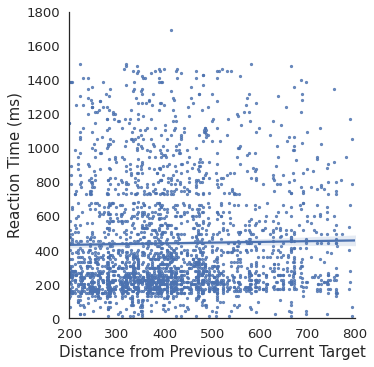

In [ ]:
## all monkeys

inds = (data['seq']>32) & (data['rt']!=-1.0) & (data['dist']!=0.) & (data['already_there']==False)
ax = sns.lmplot(x="dist", y="rt",order=1,
                scatter_kws={"s": 5},
                data=data[inds])
ax = ax.set(xlim=(200,800), ylim=(0,1800))
ax.set_axis_labels('Distance from Previous to Current Target','Reaction Time (ms)')

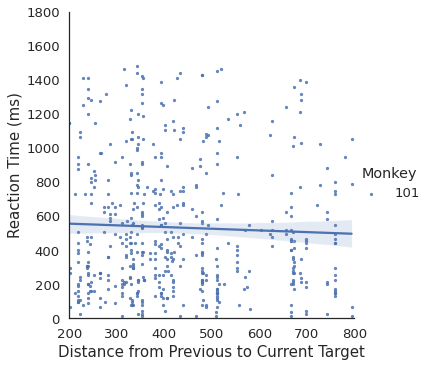

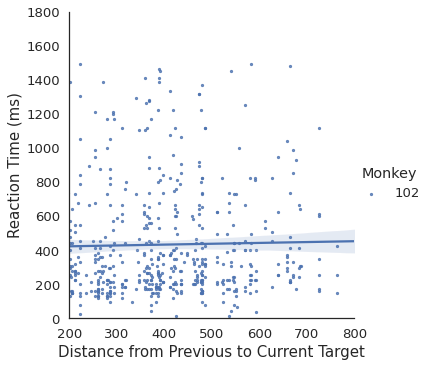

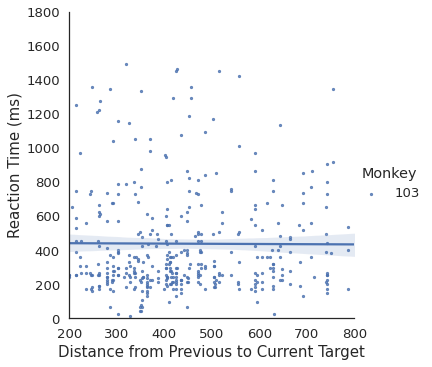

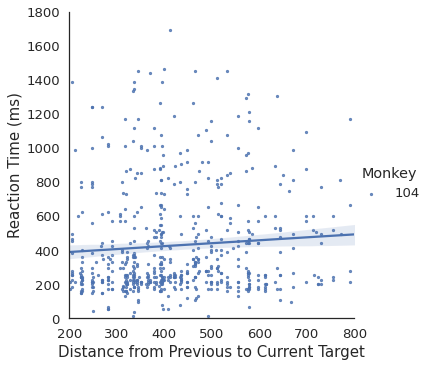

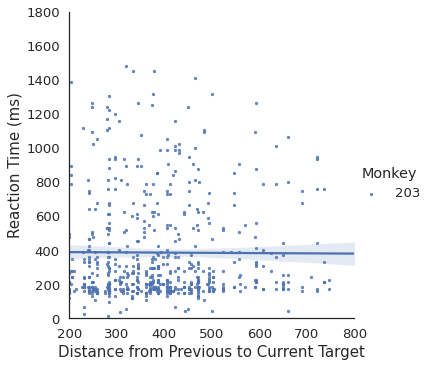

In [ ]:
## line plot for each monkey
for monkey in monkey_subjs:
    inds = (data['subj']==monkey) & (data['seq']>32) & (data['rt']!=-1.0) & (data['dist']!=0.) & (data['already_there']==False)
    ax = sns.lmplot(x="dist", y="rt",order=1,
                    hue="subj", 
                    scatter_kws={"s": 5},
                    data=data[inds])
    ax = ax.set(xlim=(200,800), ylim=(0,1800))
    ax.set_axis_labels('Distance from Previous to Current Target','Reaction Time (ms)')
    ax._legend.set_title("Monkey")

In [ ]:
## bin distance into 5 bins
n_bins = 5

labels = range(0,n_bins)
dist_vals = data['dist'].unique() 

bin_vals = np.histogram(dist_vals, n_bins, weights=dist_vals)[1]
bin_means = (np.histogram(dist_vals, n_bins, weights=dist_vals)[0] / np.histogram(dist_vals, n_bins)[0])

data['binned_dist'] = pd.cut(data['dist'], bin_vals, labels=labels).fillna(value=0).astype(int)
data['binned_dist_means'] = [bin_means[i] for i in data['binned_dist']] 

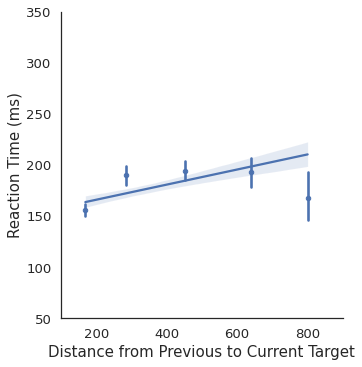

In [ ]:

ax = sns.lmplot(x="binned_dist_means", y="rt",order=1,scatter_kws={"s": 20},
                    x_estimator=np.mean,
                    data=data)
ax = ax.set(xlim=(100,900), ylim=(50,350))
ax.set_axis_labels('Distance from Previous to Current Target','Reaction Time (ms)')

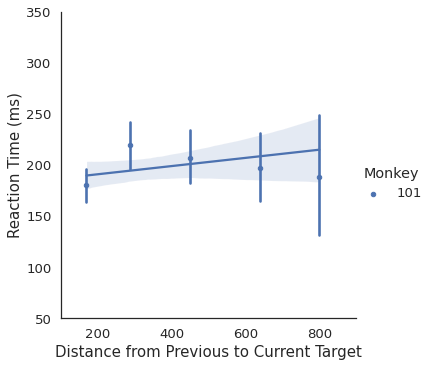

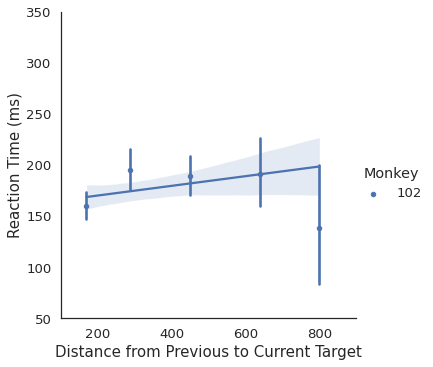

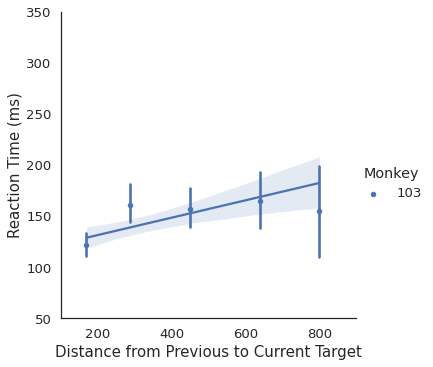

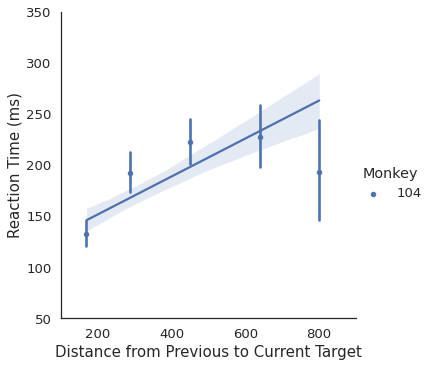

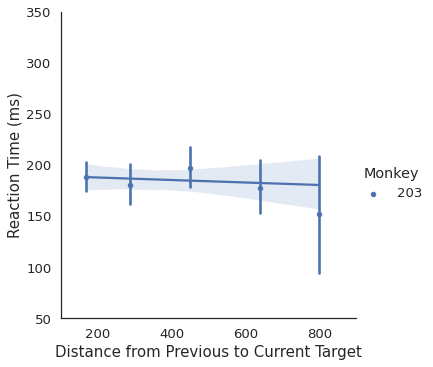

In [ ]:
for monkey in monkey_subjs:
    ax = sns.lmplot(x="binned_dist_means", y="rt",order=1,scatter_kws={"s": 20},
                    hue="subj", 
                    x_estimator=np.mean,
                    data=data[data["subj"]==monkey])
    ax = ax.set(xlim=(100,900), ylim=(50,350))
    ax.set_axis_labels('Distance from Previous to Current Target','Reaction Time (ms)')
    ax._legend.set_title("Monkey")

2. Time to get to target across events in a sequence

results: no apparent trend (not getting tired or bored as sequence goes)


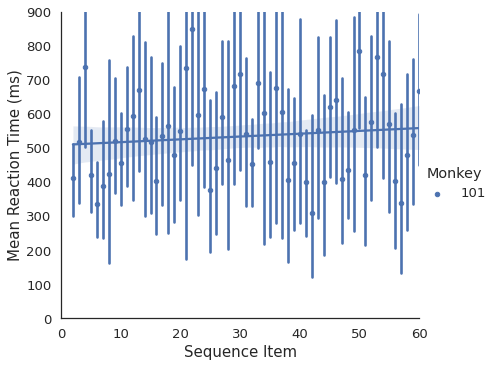

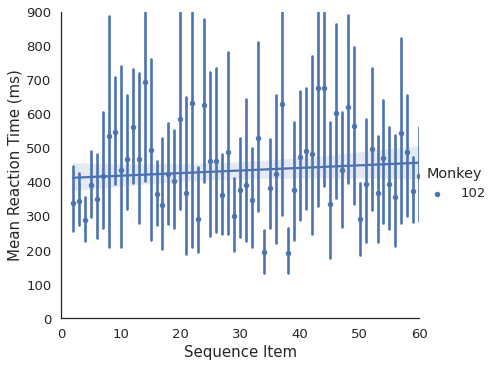

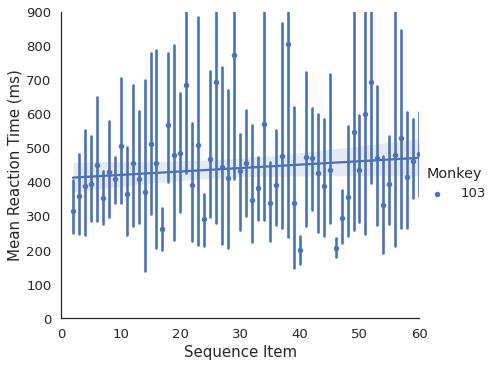

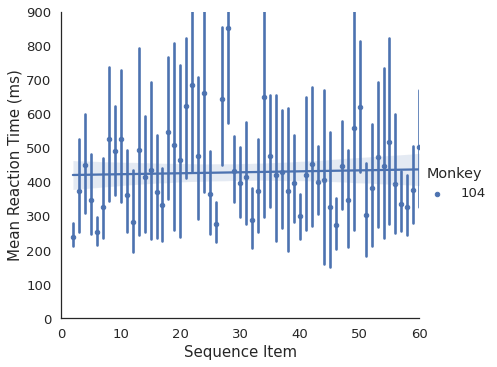

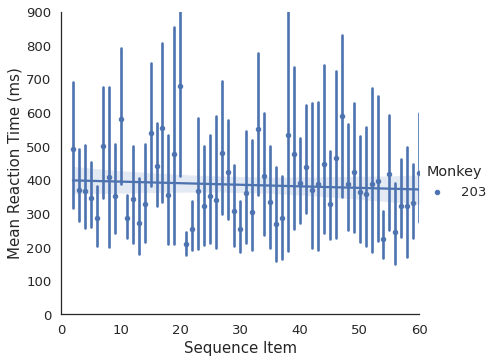

In [ ]:
for monkey in monkey_subjs:
    inds = (data['subj']==monkey) & (data['seq']>32) & (data['rt']!=-1.0) & (data['dist']!=0.) & (data['already_there']==False)
    ax = sns.lmplot(x="seq_item", y="rt",order=1,
                    hue="subj", #hue_order = [203,102,103,101,104],
                    scatter_kws={"s": 20},aspect=1.2,
                    x_estimator=np.mean,
                    data=data[inds])
    ax = ax.set(xlim=(0,60), ylim=(0,900))
    ax.set_axis_labels('Sequence Item','Mean Reaction Time (ms)')
    ax._legend.set_title("Monkey")

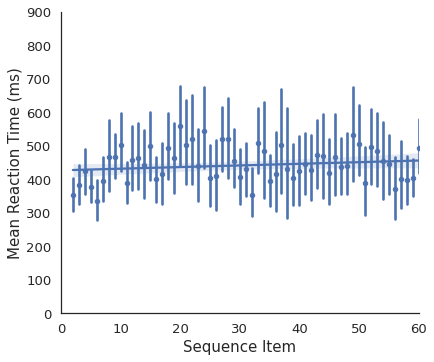

In [ ]:
inds = (data['seq']>32) & (data['rt']!=-1.0) & (data['dist']!=0.) & (data['already_there']==False)
ax = sns.lmplot(x="seq_item", y="rt",order=1,
                scatter_kws={"s": 20},aspect=1.2,
                x_estimator=np.mean,
                data=data[inds])
ax = ax.set(xlim=(0,60), ylim=(0,900))
ax.set_axis_labels('Sequence Item','Mean Reaction Time (ms)')

3. Time spent not looking at the targets across the sequence

result: no overrall trend (104 positive, 203 negative)

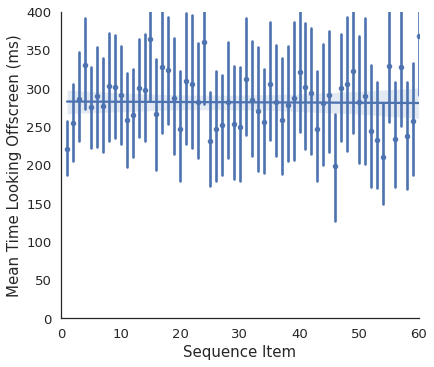

In [ ]:

inds = (data['seq']>32) & (data['rt']!=-1.0)
ax = sns.lmplot(x="seq_item", y="looks_offscreen_ms",order=1,
                scatter_kws={"s": 20},aspect=1.2,
                x_estimator=np.mean,
                data=data[inds])
ax = ax.set(xlim=(0,60), ylim=(0,400))
ax.set_axis_labels('Sequence Item','Mean Time Looking Offscreen (ms)')

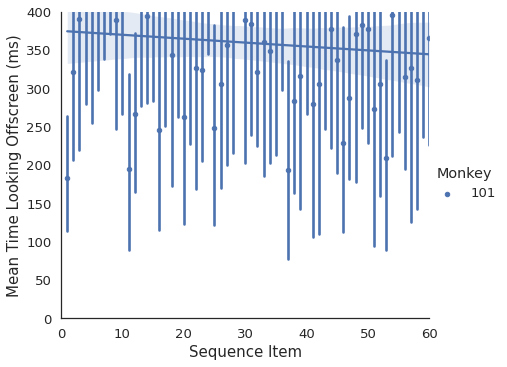

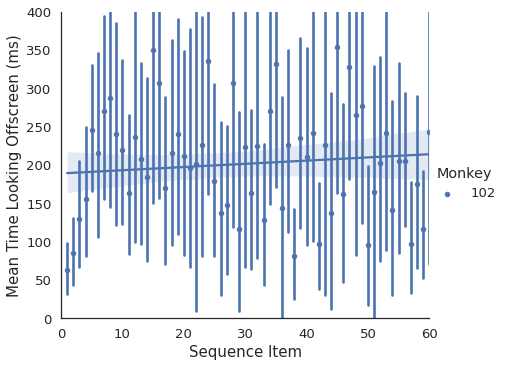

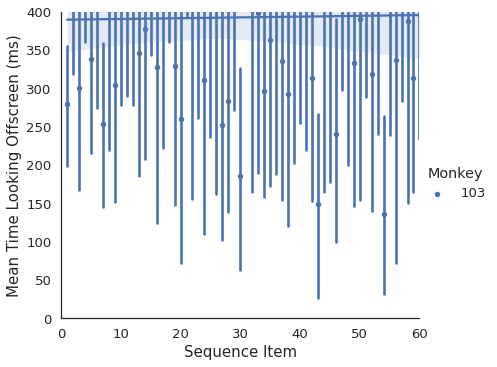

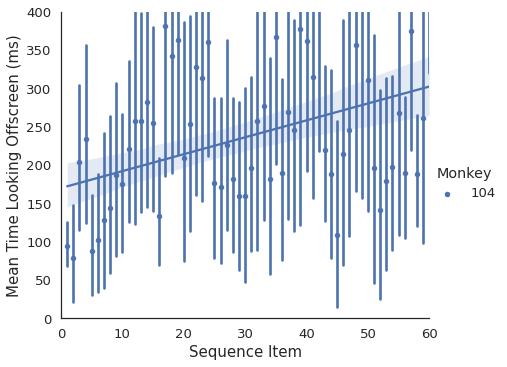

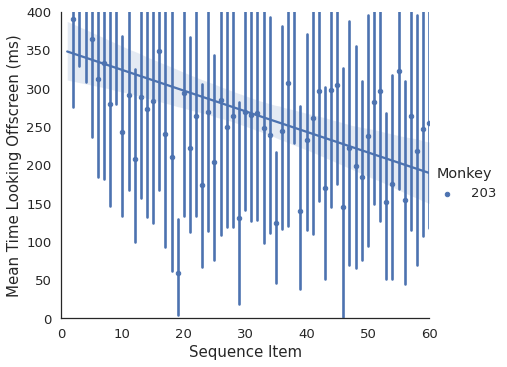

In [ ]:
for monkey in monkey_subjs:
    inds = (data['subj']==monkey) & (data['seq']>32) & (data['rt']!=-1.0)
    ax = sns.lmplot(x="seq_item", y="looks_offscreen_ms",order=1,
                    hue="subj", #hue_order = [203,102,103,101,104],
                    scatter_kws={"s": 20},aspect=1.2,
                    x_estimator=np.mean,
                    data=data[inds])
    ax = ax.set(xlim=(0,60), ylim=(0,400))
    ax.set_axis_labels('Sequence Item','Mean Time Looking Offscreen (ms)')
    ax._legend.set_title("Monkey")

### Calculate surprisal

Unigram: considers surprisal independently for all events <br>

In [ ]:
## process sequence file
allseq = pd.read_csv(path+"AllSeq.csv")
allseq = allseq.drop(columns='Unnamed: 0')
allseq['seq'] = allseq['seq'].str.split(',')
allseq = allseq.rename(columns={"seq.id": "", "seq": "Sequence Position"})
for i in range(60):
    cur_col = []
    for j in range(len(allseq)):
        curr = allseq['Sequence Position'][j][i]
        cur_col.append(curr)
    allseq[str(i+1)] = cur_col
newallseq = allseq.drop(columns='Sequence Position')
newallseq.to_csv('/content/drive/My Drive/Kidlala Lab/Monkilock/MonkeyData/newAllseq.csv', index = False)

In [ ]:
# load sequences
allseq = pd.read_csv(path+"AllSeq.csv")
allseq = allseq.drop(columns='Unnamed: 0')
allseq['seq'] = allseq['seq'].str.split(',')

,seq.id,seq
0,1,"[2, 1, 2, 2, 2, 1, 3, 3, 3, 1, 3, 1, 1, 2, 2, ..."
1,2,"[3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 2, 3, 3, 3, ..."
2,3,"[1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 3, ..."
3,4,"[3, 2, 1, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 1, 2, ..."
4,5,"[3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, ..."
...,...,...
75,76,"[2, 1, 1, 2, 1, 3, 3, 1, 1, 3, 1, 1, 2, 2, 2, ..."
76,77,"[3, 3, 3, 1, 3, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, ..."
77,78,"[2, 1, 2, 2, 3, 1, 3, 2, 3, 2, 2, 3, 2, 1, 3, ..."
78,79,"[2, 3, 1, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, 2, ..."


In [ ]:
### unigram surprisal

from scipy import stats

seq_data= pd.DataFrame(columns=['seq','seq_item','current_event','observed_1s','observed_2s','observed_3s'])

## for each sequence
for i in range(len(allseq)):
    current_seq = allseq.loc[i]
    running_sum_1s = 0
    running_sum_2s = 0
    running_sum_3s = 0
    
    for k in range(len(current_seq['seq'])):
        current_event = current_seq['seq'][k]
        if current_event == 'NA':
          break
        newrow = {
            'seq' : i+1,
            'seq_item' : k+1,
            'current_event' : int(current_event) ,
            'observed_1s' : running_sum_1s,
            'observed_2s' : running_sum_2s,
            'observed_3s' : running_sum_3s
        }

        seq_data = seq_data.append(newrow, ignore_index = True)

        #count up how many sound 1, 2, and 3's
        if current_event=='1':
          running_sum_1s = running_sum_1s+1
        if current_event=='2':
          running_sum_2s = running_sum_2s+1
        if current_event=='3':
          running_sum_3s = running_sum_3s+1

observed_current = []
for k in range(len(seq_data)):
    curr = seq_data['current_event'][k]
    if curr == 1:
        observed_current.append(seq_data['observed_1s'][k])
    elif curr == 2:
        observed_current.append(seq_data['observed_2s'][k])
    else:
        observed_current.append(seq_data['observed_3s'][k])

seq_data['observed_currents'] = observed_current
data = pd.merge(data, seq_data, on=['seq', 'seq_item'])

alpha = 1 
data['prob'] = (data['observed_currents']+alpha) / ((data['seq_item']-1) + (3*alpha))
data['prob'] = data['prob'].astype(float)
data['surprisal'] = -1 * np.log(data['prob'])

In [ ]:
### bigram surprisal

# bigram calculation helper functions
def posterior_mean_surprisal(count, index, alpha):
    p = [c + alpha for c in count] # add alpha to count for last_active
    ## countlist[index[0]] (count) -> last_active in the form of [a,a,a]
    ## count has information for last_active
    ## index[1] (index) -> current_active value - 1 (for index purpose)
    ## p[index] -> get current_value info from last_active
    ## np.sum(p) -> sum last_active
    return -(np.log(p[index]) - np.log(np.sum(p)))

def posterior_mean_tp_surprisal(countlist, index, alpha):
    return posterior_mean_surprisal(countlist[index[0]], index[1], alpha)

seq_data_bi= pd.DataFrame(columns=['seq','seq_item','unseen_items','bisurprisal'])

## for each sequence
for i in range(len(allseq)):
    current_seq = allseq.loc[i]
    counts = [0,0,0]
    tp_counts = [[0,0,0], [0,0,0], [0,0,0]] # outer is last_active, inner is active
    last_active = None
    unseen_items = [1,1,1]
    
    ## for each event in each sequence
    for k in range(len(current_seq['seq'])):
        current_event = current_seq['seq'][k]
        if current_event == 'NA':
            break
        current_event = int(current_event) - 1
        newrow = {
            'seq' : i+1,
            'seq_item' : k+1,
            'unseen_items': np.sum([i for i in unseen_items if i > 0]),
            'bisurprisal' : [np.nan if last_active is None else posterior_mean_tp_surprisal(tp_counts, [last_active, current_event], alpha)][0]
        }

        seq_data_bi = seq_data_bi.append(newrow, ignore_index = True)

        unseen_items[current_event] = 0
        counts[current_event] = counts[current_event] + 1

        if last_active is not None:
            tp_counts[last_active][current_event] = tp_counts[last_active][current_event] + 1
        last_active = current_event


data = pd.merge(data, seq_data_bi, on=['seq', 'seq_item'])
# standardize - center and square (subtract mean, divide by std dev)
data['std_surprisal'] = stats.zscore(data['surprisal'])
data['std_bisurprisal'] = stats.zscore(data['bisurprisal'], nan_policy='omit')

# create squared unigram-surprisal term
data['sq_std_surprisal'] = [el**2 for el in data['std_surprisal']]
data['sq_std_bisurprisal'] = [el**2 for el in data['std_bisurprisal']]


In [ ]:
data.to_csv(path+'csv-surprisal-prob.csv', index = False)

In [ ]:
## bin surprisal and bisurprisal
def bin_surprisal(data, n_bins, surprisal_type):        
    labels = range(0,n_bins)
    surprisal_vals = data[surprisal_type].unique() # all sequences
    
    if surprisal_type == 'bisurprisal':
        surprisal_vals = surprisal_vals[1:] # remove nan

    bin_vals = np.histogram(surprisal_vals, n_bins, weights=surprisal_vals)[1]
    bin_means = (np.histogram(surprisal_vals, n_bins, weights=surprisal_vals)[0] / np.histogram(surprisal_vals, n_bins)[0])

    binned_surprisal = pd.cut(data[surprisal_type], bin_vals, labels=labels).fillna(value=0).astype(int)
    data['binned_'+surprisal_type] = binned_surprisal
    data['binned_'+surprisal_type+'_means'] = [bin_means[i] for i in binned_surprisal]
    
    return data


## surprisal
n_bins = 5
surprisal_type = 'surprisal' # 'surprisal' or 'bisurprisal'
surprisal_label = 'Unigram Surprisal' # 'Unigram Surprisal' or 'Bigram Surprisal'

# bin surprisal values
ready_data = bin_surprisal(ready_data, n_bins, surprisal_type)

In [ ]:
surprisal_type = 'bisurprisal' # 'surprisal' or 'bisurprisal'
surprisal_label = 'Bigram Surprisal' # 'Unigram Surprisal' or 'Bigram Surprisal'

# bin surprisal values
ready_data = bin_surprisal(ready_data, n_bins, surprisal_type)

In [ ]:
ready_data.to_csv('/content/drive/My Drive/Kidlala Lab/Monkilock/MonkeyData/csv-surprisal-prob.csv', index = False)

In [ ]:
ready_data = pd.read_csv(path+'csv-surprisal-prob.csv')

,subj,trialtime,trial,seq,seq_item,active_item,prev_active,next_active,firstappear,time_till_target,item1id,item2id,item3id,date,event_time,looks_blank_ms,looks_offscreen_ms,looks_target_ms,looks1_ms,looks2_ms,looks3_ms,filename,repeated,will_repeat,rt,dist,looks_object,looks_onscreen,looks_all,looks_next_target,looks_prev_target,prop_looks_active,already_there,looks_inactive,prop_looks_inactive,looks_away,current_event,observed_1s,observed_2s,observed_3s,observed_currents,prob,surprisal,unseen_items,bisurprisal,std_surprisal,std_bisurprisal,sq_std_surprisal,sq_std_bisurprisal,binned_surprisal,binned_surprisal_means,binned_bisurprisal,binned_bisurprisal_means
0,104,0.006829,1,1,1,2,NaN,1.0,True,346.65,15,26,37,120820.0,1520.2,53.21,0.00,1186.36,146.15,1186.36,133.28,B120821.1.ML.csv,False,False,346.65,0.000000,1465.79,1519.00,1519.0,146.15,0.0,0.781014,0.0,279.43,0.183957,False,2,0,0,0,0,0.333333,1.098612,3.0,NaN,0.211754,NaN,0.044840,NaN,1,1.185095,0,0.382349
1,102,0.007159,5,1,1,2,NaN,1.0,True,279.97,22,47,15,120820.0,1506.6,106.64,199.37,986.29,199.90,986.29,13.30,C120822.4.ML.csv,False,False,279.97,0.000000,1199.49,1306.13,1505.5,199.90,0.0,0.655125,0.0,213.20,0.163230,False,2,0,0,0,0,0.333333,1.098612,3.0,NaN,0.211754,NaN,0.044840,NaN,1,1.185095,0,0.382349
2,101,0.010663,30,1,1,2,NaN,1.0,True,199.90,37,45,16,120830.0,1506.1,413.08,359.89,639.52,0.00,639.52,92.91,H120830.4.ML.csv,False,False,199.90,0.000000,732.43,1145.51,1505.4,0.00,0.0,0.424817,0.0,92.91,0.081108,True,2,0,0,0,0,0.333333,1.098612,3.0,NaN,0.211754,NaN,0.044840,NaN,1,1.185095,0,0.382349
3,103,0.009283,32,1,1,2,NaN,1.0,True,173.25,44,36,22,120910.0,1506.3,199.62,39.98,626.80,466.45,626.80,172.95,J120911.2.ML.csv,False,False,173.25,0.000000,1266.20,1465.82,1505.8,466.45,0.0,0.416257,0.0,639.40,0.436206,False,2,0,0,0,0,0.333333,1.098612,3.0,NaN,0.211754,NaN,0.044840,NaN,1,1.185095,0,0.382349
4,203,0.008023,11,1,1,2,NaN,1.0,True,186.43,12,25,36,120910.0,1506.7,252.77,972.93,280.20,0.00,280.20,0.00,K120910.4.ML.csv,False,False,186.43,0.000000,280.20,532.97,1505.9,0.00,0.0,0.186068,0.0,0.00,0.000000,True,2,0,0,0,0,0.333333,1.098612,3.0,NaN,0.211754,NaN,0.044840,NaN,1,1.185095,0,0.382349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19705,104,89.043000,81,66,60,1,3.0,NaN,False,-1.00,14,22,35,130120.0,1479.8,907.00,320.00,0.00,0.00,0.00,280.00,B130116.1.ML.csv,False,False,-1.00,344.945906,280.00,1187.00,1507.0,0.00,280.0,0.000000,NaN,280.00,0.235889,True,1,16,22,21,16,0.274194,1.293921,0.0,1.526056,0.556882,0.959179,0.310117,0.920024,1,1.185095,1,1.150466
19706,102,89.091000,81,66,60,1,3.0,NaN,False,826.37,33,15,26,130110.0,1493.3,907.00,400.00,213.00,213.00,0.00,0.00,C130109.2.ML.csv,False,False,826.37,591.282310,213.00,1120.00,1520.0,0.00,0.0,0.140132,0.0,0.00,0.000000,True,1,16,22,21,16,0.274194,1.293921,0.0,1.526056,0.556882,0.959179,0.310117,0.920024,1,1.185095,1,1.150466
19707,101,89.529000,71,66,60,1,3.0,NaN,False,559.85,16,34,23,130120.0,1493.2,1252.00,13.00,253.00,253.00,0.00,0.00,H130118.1.ML.csv,False,False,559.85,332.900403,253.00,1505.00,1518.0,0.00,0.0,0.166667,0.0,0.00,0.000000,True,1,16,22,21,16,0.274194,1.293921,0.0,1.526056,0.556882,0.959179,0.310117,0.920024,1,1.185095,1,1.150466
19708,103,89.556000,71,66,60,1,3.0,NaN,False,-1.00,23,35,17,130120.0,1492.6,0.00,1520.00,0.00,0.00,0.00,0.00,J130115.1.ML.csv,False,False,-1.00,425.852515,0.00,0.00,1520.0,0.00,0.0,0.000000,NaN,0.00,NaN,True,1,16,22,21,16,0.274194,1.293921,0.0,1.526056,0.556882,0.959179,0.310117,0.920024,1,1.185095,1,1.150466
